In [60]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy as sp
import sklearn
import feature_engine as fe


In [61]:
diabetes_dataset = pd.read_csv("../dataset/model_data/diabetes.csv", index_col="PatientID")

In [62]:
diabetes_dataset.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
PatientID,,,,,,,
1017,101,58,17,265,24.2,0.614,0
1031,108,70,0,0,30.5,0.955,1
1033,148,60,27,318,30.9,0.150,1
1035,113,76,0,0,33.3,0.278,1
1048,83,86,19,0,29.3,0.317,0


In [63]:
"""Convert the given string to snake_case, needs better handling of edge cases"""

def normalize(text: str):

    if text.isupper():
        print(text)
        return text.lower()
    else:
        output = ""
        for idx, char in enumerate(text):
            if char.isupper():
                converted_char = char.lower()
                if idx != 0 or len(char) -1:
                    converted_char = "_" + converted_char
                output += converted_char
            else:
                output += char
    
        return output


In [64]:
diabetes_dataset.columns = [normalize(col) for col in diabetes_dataset.columns]

BMI


In [65]:
diabetes_dataset.head()

,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,outcome
PatientID,,,,,,,
1017,101,58,17,265,24.2,0.614,0
1031,108,70,0,0,30.5,0.955,1
1033,148,60,27,318,30.9,0.150,1
1035,113,76,0,0,33.3,0.278,1
1048,83,86,19,0,29.3,0.317,0


In [66]:
diabetes_dataset.describe()

,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,outcome
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,120.651603,69.448980,20.634111,80.583090,31.974781,0.469886,0.348397
std,31.857707,19.040706,15.944848,117.712149,7.946174,0.328851,0.476810
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000
25%,99.000000,64.000000,0.000000,0.000000,27.300000,0.245250,0.000000
50%,117.000000,72.000000,23.000000,26.000000,32.000000,0.370500,0.000000
75%,140.000000,80.000000,32.000000,127.750000,36.600000,0.618000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,1.000000


In [67]:
patient_data = pd.read_csv("../dataset/model_data/patient_data.csv", index_col="PatientID")
patient_data.columns = [normalize(col) for col in patient_data.columns]

patient_data.head()

,birth_year,city,state,country
PatientID,,,,
1017,1998,Winona,Minnesota,United States
1031,1988,Springfield,Illinois,United States
1033,1992,Socorro,Texas,United States
1035,1998,Erie,Pennsylvania,United States
1048,1987,Sioux Falls,South Dakota,United States


In [68]:
combined = diabetes_dataset.merge(patient_data, how="left", on="PatientID")

In [69]:
combined.head()

,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,outcome,birth_year,city,state,country
PatientID,,,,,,,,,,,
1017,101,58,17,265,24.2,0.614,0,1998,Winona,Minnesota,United States
1031,108,70,0,0,30.5,0.955,1,1988,Springfield,Illinois,United States
1033,148,60,27,318,30.9,0.150,1,1992,Socorro,Texas,United States
1035,113,76,0,0,33.3,0.278,1,1998,Erie,Pennsylvania,United States
1048,83,86,19,0,29.3,0.317,0,1987,Sioux Falls,South Dakota,United States


In [70]:
pregnancy_records = pd.read_csv("../dataset/model_data/pregnancies_records.csv", index_col="PatientID")

pregnancy_records.columns = [normalize(col) for col in pregnancy_records.columns]

pregnancy_records.head(20)

,pregnancy_record_i_d
PatientID,
1017,7119
1017,7120
1031,7217
1031,7218
1031,7219
1031,7220
1031,7221
1031,7222
1031,7223


In [71]:
output = []

for id in combined.index:
    if id in pregnancy_records.index:
        output.append(len(pregnancy_records.loc[id]))
    else:
        output.append(0)

combined["number_of_pregnancies"] = output

In [72]:
combined.head()

,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,outcome,birth_year,city,state,country,number_of_pregnancies
PatientID,,,,,,,,,,,,
1017,101,58,17,265,24.2,0.614,0,1998,Winona,Minnesota,United States,2
1031,108,70,0,0,30.5,0.955,1,1988,Springfield,Illinois,United States,8
1033,148,60,27,318,30.9,0.150,1,1992,Socorro,Texas,United States,4
1035,113,76,0,0,33.3,0.278,1,1998,Erie,Pennsylvania,United States,0
1048,83,86,19,0,29.3,0.317,0,1987,Sioux Falls,South Dakota,United States,4


In [73]:
combined.head().T

PatientID,1017,1031,1033,1035,1048
glucose,101,108,148,113,83
blood_pressure,58,70,60,76,86
skin_thickness,17,0,27,0,19
insulin,265,0,318,0,0
bmi,24.2,30.5,30.9,33.3,29.3
diabetes_pedigree_function,0.614,0.955,0.15,0.278,0.317
outcome,0,1,1,1,0
birth_year,1998,1988,1992,1998,1987
city,Winona,Springfield,Socorro,Erie,Sioux Falls
state,Minnesota,Illinois,Texas,Pennsylvania,South Dakota


In [74]:
from datetime import datetime

# convert birth year to age

combined.birth_year.dtype

age = [datetime.now().year - year for year in combined.birth_year]

combined["age"] = age

In [75]:
combined.head().T

PatientID,1017,1031,1033,1035,1048
glucose,101,108,148,113,83
blood_pressure,58,70,60,76,86
skin_thickness,17,0,27,0,19
insulin,265,0,318,0,0
bmi,24.2,30.5,30.9,33.3,29.3
diabetes_pedigree_function,0.614,0.955,0.15,0.278,0.317
outcome,0,1,1,1,0
birth_year,1998,1988,1992,1998,1987
city,Winona,Springfield,Socorro,Erie,Sioux Falls
state,Minnesota,Illinois,Texas,Pennsylvania,South Dakota


In [76]:
combined["glucose_insulin_difference"] = np.absolute(diabetes_dataset["glucose"] - diabetes_dataset["insulin"])

In [77]:
combined.to_csv("../feature_store/feature_data_milestone_1")

In [78]:
combined_from_file = pd.read_csv("../feature_store/feature_data_milestone_1", index_col="PatientID")

In [79]:
combined_from_file.head()

,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,outcome,birth_year,city,state,country,number_of_pregnancies,age,glucose_insulin_difference
PatientID,,,,,,,,,,,,,,
1017,101,58,17,265,24.2,0.614,0,1998,Winona,Minnesota,United States,2,26,164
1031,108,70,0,0,30.5,0.955,1,1988,Springfield,Illinois,United States,8,36,108
1033,148,60,27,318,30.9,0.150,1,1992,Socorro,Texas,United States,4,32,170
1035,113,76,0,0,33.3,0.278,1,1998,Erie,Pennsylvania,United States,0,26,113
1048,83,86,19,0,29.3,0.317,0,1987,Sioux Falls,South Dakota,United States,4,37,83


In [80]:
# Determine correlations using the target variable

corrs = combined_from_file.corr(numeric_only=True)["outcome"]

In [81]:
# Use all features

X = combined[corrs.index]


In [82]:
X.head()

,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,outcome,birth_year,number_of_pregnancies,age,glucose_insulin_difference
PatientID,,,,,,,,,,,
1017,101,58,17,265,24.2,0.614,0,1998,2,26,164
1031,108,70,0,0,30.5,0.955,1,1988,8,36,108
1033,148,60,27,318,30.9,0.150,1,1992,4,32,170
1035,113,76,0,0,33.3,0.278,1,1998,0,26,113
1048,83,86,19,0,29.3,0.317,0,1987,4,37,83


In [83]:
# separate the target variable

y = combined["outcome"]

X = X.drop(columns=["outcome", "birth_year"])

In [84]:
# glucose_insulin_difference is experimental
# may need to remove this feature depending
X.describe()

,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,number_of_pregnancies,age,glucose_insulin_difference
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,120.651603,69.448980,20.634111,80.583090,31.974781,0.469886,3.819242,36.320700,92.368805
std,31.857707,19.040706,15.944848,117.712149,7.946174,0.328851,3.368724,11.884815,73.060816
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000,24.000000,0.000000
25%,99.000000,64.000000,0.000000,0.000000,27.300000,0.245250,1.000000,27.000000,35.000000
50%,117.000000,72.000000,23.000000,26.000000,32.000000,0.370500,3.000000,32.000000,92.000000
75%,140.000000,80.000000,32.000000,127.750000,36.600000,0.618000,6.000000,44.000000,124.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,17.000000,84.000000,657.000000


In [85]:
# Split data into 80/20 train/test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, test_size=.20)

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures


from sklearn.pipeline import Pipeline

scaler_pipeline = Pipeline(steps=[("scaler", RobustScaler()), ("poly", PolynomialFeatures(degree=2))])


preprocessor = ColumnTransformer(
    transformers=[
        ("scaler", scaler_pipeline, X.columns)
    ]
)


lr_estimator = Pipeline(steps=[("preprocessor", preprocessor), ("model", LogisticRegression())])

lr_estimator.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures())]),
                                                  Index(['glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi',
       'diabetes_pedigree_function', 'number_of_pregnancies', 'age',
       'glucose_insulin_difference'],
      dtype='object'))])),
                ('model', LogisticRegression())])

In [87]:
# Check the raw accuracy
lr_estimator.score(X_test, y_test)

0.8043478260869565

In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_predictions = lr_estimator.predict(X_test)

In [89]:
# Check the confusion matrix
from sklearn.metrics import roc_auc_score

cm = confusion_matrix(y_test, y_predictions)

In [90]:
roc_auc_score(y_test, y_predictions)

0.7818181818181819

In [91]:
# True negatives, false positives
# False negatives, true positives

cm

array([[76, 12],
       [15, 35]])

In [92]:
cm_graphic = ConfusionMatrixDisplay(confusion_matrix=cm)

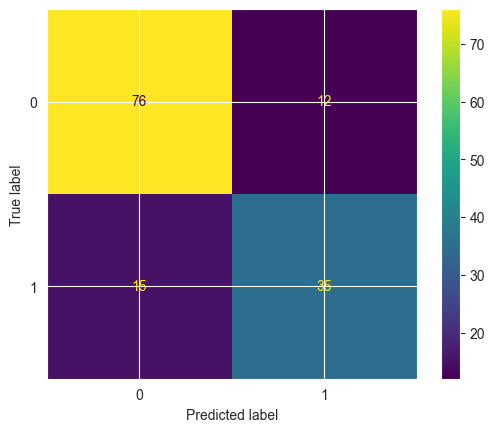

In [93]:
cm_graphic.plot()

In [94]:
from sklearn.metrics import classification_report

# Precision -accuracy of the positive predictions
# Recall - sensitivity to the true positive rate
# f1 score - weighted harmonic mean between 1 (best) 
# and 0 (worst)
# support - number of instances of class in 
# test (true) data


print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        88
           1       0.74      0.70      0.72        50

    accuracy                           0.80       138
   macro avg       0.79      0.78      0.79       138
weighted avg       0.80      0.80      0.80       138



In [96]:
# save model using joblib/pickle

import joblib


joblib.dump(lr_estimator, "../caches/logistic-regression-model-v1.pkl")

['../caches/logistic-regression-model-v1.pkl']